# Project: Investigating No Show Appointments
## By: Isaac Aboagye Ampem

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report seeks to analyze a dataset  on over 100,000 medical appointment information from Brazil which pivots on whether or not the patients honoured their appointments or not. 

> In the dataset, the column names 'ScheduledDay' tells when appointment was scheduled to take place, 'AppointmentDay' refers to the actual day the patient met the Doctor, 'Neighborhood' refers to the Hospital's location and 'Scholarship' indicates if a patient has or doesn't have a scholarship. The 'No-show' column indicates 'No - meaning patient honoured the appointment' and 'Yes - meaning patient didn't honour the appointment'. Sms_received indicates a '0' for patients not contact via sms to remind them of theri appointmet and '1'
 represents otherwise


<a id="bq1"></a>

 
### The Report Seeks to Answer These Questions; (Click on Question to go to solution in notebook)
<ul>
<li><a href="#q1">1. What is the Distribution of Appointments by Attendance?</a></li>
<li><a href="#q2">2. What is the Appointment Distribution per Hospital?</a></li>
<li><a href="#q3">3. What is the Attended Appointment Distribution by Hospital?</a></li>
<li><a href="#q4">4. What is the Proportion of Attended and Not Attended Appointments for Hospital with Highest Appointments?</a></li>
<li><a href="#q5">5. Which Patient Has the Highest Appointments?</a></li>
<li><a href="#q6">6. What is the Age Distribution of Patients?</a></li>
<li><a href="#q7">7. What is the Distribution of Appointment Attendance by Demographics?</a></li>
<li><a href="#q8">8. What is the Distribution of Appointments by Gender?</a></li>
<li><a href="#q9">9. Which Gender Attended Appointments the Most?</a></li>
<li><a href="#q10">10. What is the Distribution of Patients by Welfare Enrolment Status?</a></li>
<li><a href="#q11">11. Does Being on the Welfare Programme Have a Positive Impact on Attended Appointment?</a></li>
<li><a href="#q12">12. What is the Appointment Distribution by Health Issue / Condition of Patients?</a></li>
<li><a href="#q13">13. How Does Sending SMS Reminders Impact Attendance?</a></li>
<li><a href="#q14">14.What is the Average Delay in Attending Scheduled Appointment in Days?</a></li>
<li><a href="#q15">15. What is the Change in Appointment Attendance from 2015 to 2016?</a></li>
</ul>

### Importing Required Libraries

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style

<a id='wrangling'></a>
## Data Wrangling


### Phase-1: Loading and Reviewing General Properties of the Dataset

#### Loading and view dataset

In [2]:
# load dataset
appointment_data = pd.read_csv('patient_appointment_data.csv')

# view first five(5) entries of dataset
appointment_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Comments: Loading and Viewing dataset

    The above code displays the first 5 entries of the data to help know how the data is structered. It can be seen that:
    
        1. two date columns (ScheduledDay and AppointmentDay) are mixed with the letter T and Z. These need to be taken out.
        
        3. column names are not consistent. This also need to be corrected

#### Viewing Dataset Properties

In [3]:
# view general information about dataset
appointment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Comements:

    1. The code above examines for general information about the dataset e.g. number of rows and columns, column names, the
       datatypes (Dtype) in the columns and if there are missing values or not. 
    
    2. It could be seen that this dataset has 110527 rows and 14 columns, no missing entries in any of the columns and has 
       1 column having float data type (i.e. decimals), 8 columns with int64 datatype (i.e. integers) and 5 columns have 
       object data type (i.e. string)
    
    3. Also, columns like 'PatientId', 'ScheduledDay', and 'AppointmentDay' have wrong data types and needs to be changed to
       integer, datetime and datetime respectively.

In [4]:
# check for number of unique Patient ID and Appointment ID
print(appointment_data['PatientId'].nunique(), appointment_data['AppointmentID'].nunique())

62299 110527


Comments:

    1. It could be seen that the Appointment ID column has unique values for all 110527 entries. This could be drop as it 
       would help in generating any insight. 
       
    2. The Patient ID column however would be kept. Unlike the Appointment ID column, it
       has instances of duplicated unique values which shows instances a particular patient was scheduled for an 
       appointment.

In [5]:
# view the general statistics on the columns of the datasets
appointment_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Comments:

    The code above outputs statistics on the columns with numerical entries in the dataset. From the statistics above;
        1. of all the patients schdeuld for appointment, the youngest age was -1 and the oldest were 115 
           years old and the average age was 37 years. Since age can not be a negative value, this entry would be replaced 
           with the mean value of all the ages.
        
        2. hipertention was the medical issue most patients scheduled for appointment had, followed by diabetes, alcoholism 
           and lastly hand_cap. (This is infered by their mean values since the entries are either 1 or 0. The greater the 
           mean, the higher the number of such medical conditions.
           
        3. a greater number of patients are not enrolled on the Brasilian Welfare Program. The mean for the scholarship 
           column is less than 0.5. Since the column entries are just 0 and 1, a mean of 0.5 would signify equal number of
           patients enrolled or not enrolled ont the welfare program. A mean of less than 0.5 signifies most of the 
           patients are not enrolled on the Brasilian Welfare Program and vice versa.
 
        4. most patients were not contatcted via sms. Reason is same as that of point 3 above.
        
        4. Handcap column has maximum value of 4. This should be rectify such that the column contains onlt zeros and 
           ones (0 & 1)

#### Conclusion from Phase-1 of Data Wrangling

>To make the dataset clean for use;
> 1. standardize column names by changing all to lower case, and intro underscore where needed.
> 2. Replace all "T"s and "Z"s in the SceduledDay and AppointmentDay columns
> 3. split ScheduledDay and AppointmentDay columns each into two difference columns each and rename the resulting columns
> 4. drop all unwanted columns (e.g. the time columns that would be generated from the split in point 2)
> 5. replace negative age value with mean of ages
> 6. Add an extra column based on demographics of patients
> 7. Change the datatypes of specific columns as required

### Phase 2: Cleaning Dataset to Ensure Insights Generated Afterwards are Error-Free

#### Standardizing Column Names

In [6]:
# change all column names to lower case
appointment_data.columns = appointment_data.columns.str.lower().str.replace('-','_')

# introduce underscore in the following column names; 'patientid', 'scheduledday' and 'appointmentday'
appointment_data.rename(columns={'patientid':'patient_id','appointmentid':'appointment_id',
                                 'scheduledday':'scheduled_day','appointmentday':'appointment_day'}, inplace =True)

# view changes effect
appointment_data.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Comment: 
    
    Column names changed to include only lower case letters and underscores between two words

#### Manipulating Dataset Columns

In [7]:
# replace T with a space and remove Z from scheduled_day and appointment_day columns
appointment_data['scheduled_day'] = appointment_data['scheduled_day'].str.replace('T',' ').str.replace('Z','')
appointment_data['appointment_day'] = appointment_data['appointment_day'].str.replace('T',' ').str.replace('Z','')

Comments: 

    All "T"s are replaced with a space and "Z"s removed from the scheduled_day and appointment_day columns.

In [8]:
# split scheduled_day and appointment_day columns
appointment_data[['scheduled_day','scheduled_time']] = appointment_data['scheduled_day'].str.split(' ', expand=True)
appointment_data[['appointment_day','appointment_time']] = appointment_data['appointment_day'].str.split(' ', expand=True)

Comment:

    The two datetime columns are split each into a date column and a time column.

In [9]:
# view dataset for effected changes
appointment_data.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduled_time,appointment_time
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,00:00:00


Comment:

    Dataset is viewed to see effected change

In [10]:
# print all columns with their respective indices
for i, j in enumerate(appointment_data.columns):
    print(i,j)

0 patient_id
1 appointment_id
2 gender
3 scheduled_day
4 appointment_day
5 age
6 neighbourhood
7 scholarship
8 hipertension
9 diabetes
10 alcoholism
11 handcap
12 sms_received
13 no_show
14 scheduled_time
15 appointment_time


Comment:
    
    All column names are printed out with their respective indices to enable ease of dropping appropriate columns by index

In [11]:
# drop unwanted columns: 'appointment_id', 'schdeled_time', 'appointment_time'

appointment_data.drop(appointment_data.columns[[1,14,15]], axis=1, inplace=True)

Comment:

    Dropped unwanted columns for the purposes of this analysis. These are 'appointment_id', 'schdeled_time', and
    'appointment_time' columns

In [12]:
# view effected changes
appointment_data.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Comment:


    Checking that dropped columns are no longer in the dataset

In [13]:
# replace negative age value(s) with mean of ages
appointment_data['age'] = np.where(appointment_data['age'] < 0, 
                                   round(appointment_data['age'].mean()), appointment_data['age'])

# convert hancap column to only 0s and 1s
appointment_data['handcap'] = np.where(appointment_data['handcap']>0, 1, 0)

Comments:

    1. Negative age value(s) (-1) replaced with the mean of all the patients ages
    2. Handcap column converted to contain only zeros and ones as it is for the other medical condition columns
    
[Knowledge Source: Replacing negative values](https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/)

[knowledge source: Rounding decimals](https://www.guru99.com/round-function-python.html#:~:text=May%203%2C%202022-,Round(),round%20to%20the%20nearest%20integer.)

In [14]:
# verify change is effected
appointment_data.describe()

,patient_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.089218,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026
std,2.560949e+14,23.109921,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873
min,3.920000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Comment:

    Verifying negative ages have been replaced. It could be seen that the minimum age is now zero.

In [15]:
# Set parameters to be used for creating new column based on demographics

# define demographics 
demographics = [-1,17,39,59,120]

# set demographic identifiers
demographics_id = ['child', 'adult', 'middle age', 'old']

<a id="demo"></a>
Comments:

    Demographic categories is deifined as below
    1. Ages 0 - 17  -> child
    2. Ages 18 - 39 -> adult
    3. Ages 40 - 59 -> middle age
    4. Ages 60 and above -> old
<ul>
<li><a href="#back4">Back 5</a></li>
<li><a href="#demo_prop">Back 8</a></li>    
</ul>

In [16]:
# create additional column (demographics) to categorize age of pattients
appointment_data['demographics'] = pd.cut(appointment_data['age'], demographics, labels=demographics_id) 

Comment:    

    Add extra column called demograhics to categorize patients ages

In [17]:
# testing to check efefctiveness of age categorization made
appointment_data[appointment_data['age']==60].head(2)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,demographics
75,1.488942e+11,F,2016-04-18,2016-04-29,60,JABOUR,0,0,0,0,0,0,No,old
294,6.492948e+12,M,2016-03-14,2016-04-29,60,ANDORINHAS,0,1,1,0,0,1,No,old


Comment:
    
    1. Checking effectiveness of the category column (demograhics) created
    2. Change number (currently 60) to verify different ages and their category

#### Changing Data Types

In [18]:
# view data types in dataset
appointment_data.dtypes

patient_id          float64
gender               object
scheduled_day        object
appointment_day      object
age                   int64
neighbourhood        object
scholarship           int64
hipertension          int64
diabetes              int64
alcoholism            int64
handcap               int32
sms_received          int64
no_show              object
demographics       category
dtype: object

Comment:
    
    Checking datatypes of the resulting dataframe columns

In [19]:
# # change data types of particular columns

appointment_data = appointment_data.astype({'patient_id':'int64', 'age':'int64','demographics':'str'}) # use np.int64 or 'int64'

# # change scheduled_day and appointday to date time
appointment_data['scheduled_day'] = pd.to_datetime(appointment_data['scheduled_day'])
appointment_data['appointment_day'] = pd.to_datetime(appointment_data['appointment_day'])


Comments:

    1. patient_id column data type changed from float (decimals) to integer data type
    2. demographics column data type changed from category to string (object)
    3. scheduled_day column data type changed from string(object) to datetime
    4. appointment_day column data type changed from string(object) to datetime

[knowledge source:](https://www.geeksforgeeks.org/python-pandas-dataframe-astype/)

In [20]:
# check effected changes on data types and that there are no missing values
appointment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  int64         
 1   gender           110527 non-null  object        
 2   scheduled_day    110527 non-null  datetime64[ns]
 3   appointment_day  110527 non-null  datetime64[ns]
 4   age              110527 non-null  int64         
 5   neighbourhood    110527 non-null  object        
 6   scholarship      110527 non-null  int64         
 7   hipertension     110527 non-null  int64         
 8   diabetes         110527 non-null  int64         
 9   alcoholism       110527 non-null  int64         
 10  handcap          110527 non-null  int32         
 11  sms_received     110527 non-null  int64         
 12  no_show          110527 non-null  object        
 13  demographics     110527 non-null  object        
dtypes: datetime64[ns](2)

Comment:

    Data is now clean and has no missing values. It is ready for exploration now.

<a id='eda'></a>
## Exploratory Data Analysis

 

### 1. What is the Distribution of Appointments by Attendance?
<a id='q1'></a>
<li><a href='#bq1'>Back</a></li>

#### 1.1 Compute Number of Appointments Attended and Not Attended

In [21]:
# Compute number of appointments attended and not attended.
total_apt_attendance = appointment_data['no_show'].value_counts()
# view results
total_apt_attendance

No     88208
Yes    22319
Name: no_show, dtype: int64

Comment:
    
    Relatively, more appointments were attended as the count of "No" is higher than "Yes"
    NB: 'No' means appointment was attended, 'Yes' means patient did not attend the scheduled appointment

#### 1.2 Visualizing appointments attended and not attended

In [22]:
# define function to plot 1*2 matrix showing bar plot and pie plot
def plot_bar_pie(x, y, title, x_label, y_label, label_a, label_b):
    # set figure size
    plt.figure(figsize=(14,5))
    # set horizontal spacing between subplots
    plt.subplots_adjust(wspace=0.9)
    # choose style to use
    style.use('seaborn')

    # set location of first plot
    plt.subplot(1,2,1)
    # plot bar chart
    plt.bar([label_a, label_b], [x,y])
    # Assign bar chart title
    plt.title(title, font={'size':20}, loc='center')
    # Assign x-axis label
    plt.xlabel(x_label, fontdict={'size':14})
    # Assign y-axis label
    plt.ylabel(y_label, fontdict={'size':14})

    # set location for second plot
    plt.subplot(1,2,2)
    # plot pie chart
    plt.pie([x,y], labels=[label_a, label_b],autopct='%1.1f%%', startangle=180)
    # Assign pie chart title
    plt.title(title, font={'size':20}, loc='center')
    return plt.show()

[knowledge source: Changing font size](https://www.tutorialexample.com/understand-matplotlib-fontdict-a-beginner-guide-matplotlib-tutorial/)

[knowledge source:Changing title font  location](https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html)

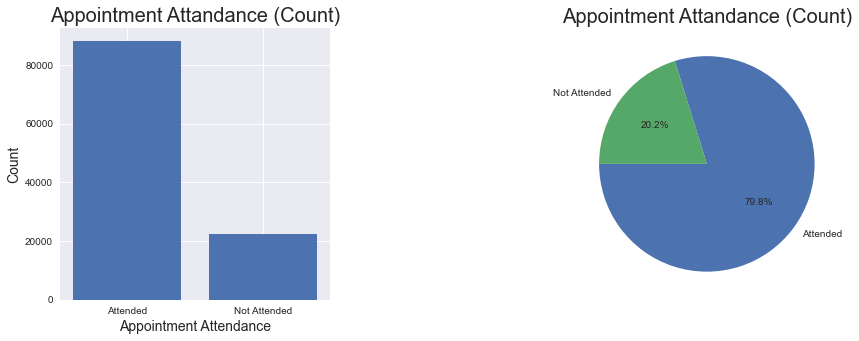

In [23]:
# Plot bar and pie charts showing appointments attended and not attended
plot_bar_pie(total_apt_attendance[0], total_apt_attendance[1], 'Appointment Attandance (Count)',
             'Appointment Attendance','Count','Attended','Not Attended')

In [24]:
total_apt_attendance[0]

88208

Comments:

    1. A total of 88208 out of 110527 appointments were attended. 
    2. This constitute 79.8 % of the entire appointments scheduled.

### 2. What is the Appointment Distribution per Hospital?
<a id='q2'></a>
<li><a href='#bq1'>Back</a></li>

#### 2.1 Visualizing Appointment Distribution per Hospital

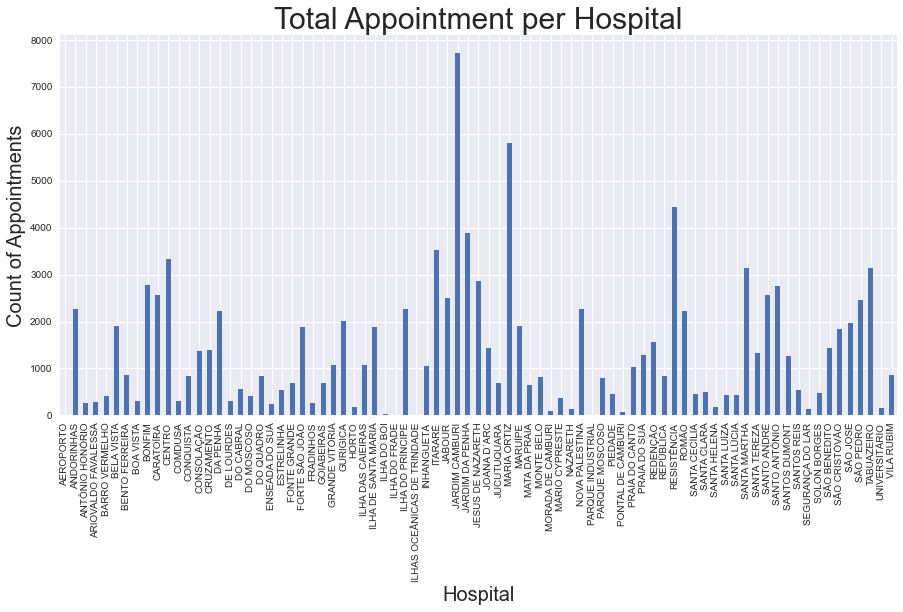

In [25]:
# Compute counts of appointments per hospital
hospital_appointments = appointment_data.groupby('neighbourhood').count()['no_show']

# set figure size
plt.figure(figsize=(15,7))

#  plot appointment for each hospital
hospital_appointments.plot(kind='bar')
# Assign chart title
plt.title('Total Appointment per Hospital', font={'size':30})
# Assign chart x-axis label
plt.xlabel('Hospital', font={'size':20})
# Assign chart y-axis label
plt.ylabel('Count of Appointments', font={'size':20})
# show plot
plt.show()

Comment:

    1. The graph shows Jardim Camburi Hospital has the highest number of scheduled appointments. 
    2. This signifies that most patients prefer it to other hospitals or the people in that location have more health
       conditions than those in other cities.

#### 2.2. Compute Highest and Lowest Appointments for a Hospital

In [26]:
# find highest individual hospital's appointments
max =hospital_appointments.max()

# find lowest individual hospital's appointments
min = hospital_appointments.min()

# print hospital with highest and lowest appointments
print(max,"," ,min)

7717 , 1


Comment:
    
    Highest count of appointments for a hospital is  7717  and the Lowest is  1

In [27]:
# create dataframe for hospital appointments
hospital_appointments_df = pd.DataFrame(hospital_appointments)

<a id="Q2"></a>

In [28]:
# find name of hospital with highest appointments
highest_hsp_apt = hospital_appointments_df.index[hospital_appointments_df.no_show==max]
#view results
highest_hsp_apt

Index(['JARDIM CAMBURI'], dtype='object', name='neighbourhood')

Comment:

    Jardim Camburi hospital has the highest number of appointments which is 7717.
<ul>
<li><a href="#back1">Back 1, 2</a></li>
</ul>

In [29]:
# find name of hospital with lowest appointments
lowest_hsp_apt = hospital_appointments_df.index[hospital_appointments_df.no_show==min]
lowest_hsp_apt

Index(['PARQUE INDUSTRIAL'], dtype='object', name='neighbourhood')

Comment:

    The Parque Industrial hospital has the lowest number of appointments which is 1.

### 3. What is the Attended Appointment Distribution by Hospital?
<a id='q3'></a>
<li><a href='#bq1'>Back</a></li>

In [30]:
# crate dataframe of all attended appointments
attended_appointment = appointment_data.query('no_show == "No"')

Comment:
       
       Filtered Data for Attended Appointment Only

In [31]:
# create data frame of all attended appointments by hospital
attended_per_hsp_df = pd.DataFrame(attended_appointment['neighbourhood'].value_counts())
# view results
attended_per_hsp_df.head()

,neighbourhood
JARDIM CAMBURI,6252
MARIA ORTIZ,4586
RESISTÊNCIA,3525
JARDIM DA PENHA,3246
SANTA MARTHA,2635


Comment:
    
    Calculated the number of attended appointments for each hospital and viewed just the top five(5) elements


In [32]:
# create data frame for total appointments (attended and not attended) by hospital
total_hsp_apt = pd.DataFrame(appointment_data['neighbourhood'].value_counts())
# view results
total_hsp_apt.head()

,neighbourhood
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4431
JARDIM DA PENHA,3877
ITARARÉ,3514


Comment:
    
    Calculated the number total number of scheduled appointments for each hospital and viewed just the top five(5) elements

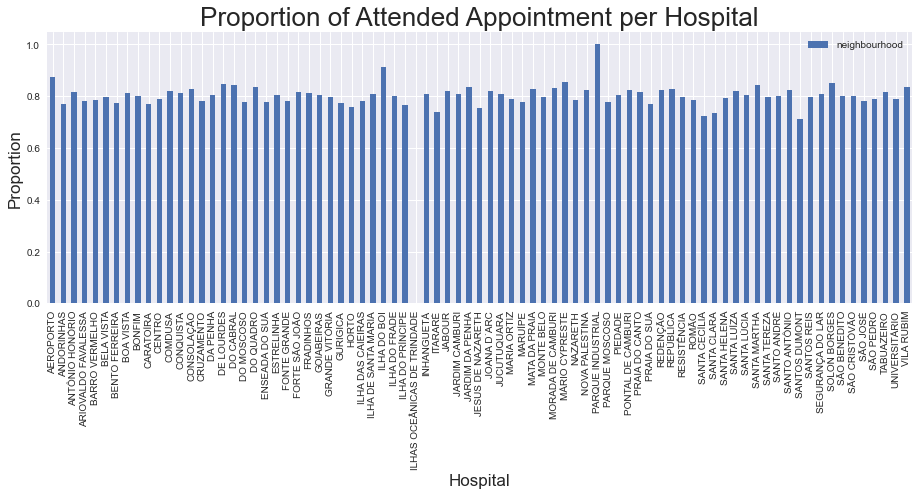

In [33]:
# Assign variable for attended appointments as aroportion of total appointment for each hospital
attended_hsp_prop = attended_per_hsp_df / total_hsp_apt

# plot proportions of attended appoints per hospital
attended_hsp_prop.plot(kind='bar')
# set figure size. NB: used because plot was not resizing with plt.figure command
plt.gcf().set_size_inches(15.5,5)
# Assign x-axis label
plt.xlabel('Hospital', font={'size':17})
# Assign y-axis label
plt.ylabel('Proportion', font={'size':17})
# Assign chart title
plt.title('Proportion of Attended Appointment per Hospital', loc='center', font={'size':26})
# display chart
plt.show()

Comment:

    The chart shows the rate of attended appointments per hospital. From the graph, Paraque Industrial Hospital has the 
    highest rate of appointment attendance

[knowledge source: figure resizing](https://stackoverflow.com/questions/52274643/figsize-in-matplotlib-is-not-changing-the-figure-size)

In [34]:
# find hospital with highest proportion of attendance
attended_hsp_prop.index[attended_hsp_prop['neighbourhood']==attended_hsp_prop.max()[0]]

Index(['PARQUE INDUSTRIAL'], dtype='object')

Comment:
    
    Computed hospital with highest appointment attendance rate. the results confirms the deductions from the bar char above
    that, Paraque Industrial Hospital has the  highest rate of appointment attendance.

In [35]:
# find hospital with lowes proportion of attendance
attended_hsp_prop.index[attended_hsp_prop['neighbourhood']==attended_hsp_prop.min()[0]]

Index(['SANTOS DUMONT'], dtype='object')

Comment:

    Computed hospital with lowest appointment attendance rate. The results reveals Santos Dumont Hospital has the  
    lowest  rate of appointment attendance.
       

### 4. What is the Proportion of Attended and Not Attended Appointments for Hospital with Highest Appointments?
<a id='q4'></a>
<li><a href='#bq1'>Back</a></li>

#### 4.1 Find Hospital with Highest Scheduled Appointments

In [36]:
# find number of attended appointments for hospital with highest appointments i.e. 'JARDIM CAMBURI'
attended_per_hsp_df[attended_per_hsp_df.index =='JARDIM CAMBURI']

,neighbourhood
JARDIM CAMBURI,6252


<a id="back1"></a>
Comment:

    6252 out of the 7717 appointments scheduled for Jardim Camburi hospital was attended. 
    
<ul>
<li><a href="#Q2">Refer 1</a></li>
</ul>

#### 4.2 Visualize Proportinate Attended Appointment of Highest Scheduled Patient

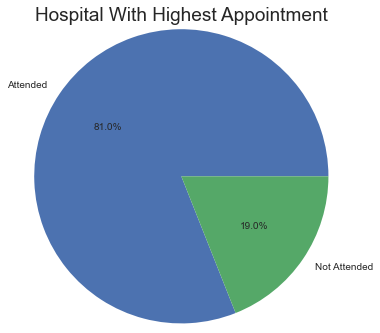

In [37]:
# Plot proportion of appointment "attended" and "not attended" for hospital with highest appointments
plt.pie([6252/max,(max-6252)/max],labels=['Attended','Not Attended'], autopct='%1.1f%%', radius = 1.23)
# Assign chart title
plt.title('Hospital With Highest Appointment', font={'size':19}, loc = 'center')
#display chart
plt.show()

Comment:

    81% of the total scheduled appointments for Jardim Camburi (hospital with highest scheduled appointments) was attended.
<ul>
<li><a href="#Q2">Refer 2</a></li>
</ul>

### 5. Which Patient Has the Highest Appointments?
<a id='q5'></a>
<li><a href='#bq1'>Back</a></li>

In [38]:
# Create dataframe of appointment distribution by patients data frame
patient_apt = pd.DataFrame(appointment_data.groupby('patient_id').count().no_show)

In [39]:
# view appointment distribution by patients data frame
patient_apt.head(2)

,no_show
patient_id,
39200,1
43700,1


Comment:

    Number of scheduled appointments for each patient was computed and first two elements of the dataset viewed

In [40]:
# filter for highest appointments for a single patient
highest_patient_apt = patient_apt.max()
highest_patient_apt

no_show    88
dtype: int64

<a id="patient88"></a>
Comment:

    The are 88 scheduled appointments for a patient which is the highest among all the patients
<ul>    
<li><a href ="#back2">Back 3</a></li>
</ul>

In [41]:
# Filter for patient with highest number of appointments
patient_apt.index[patient_apt['no_show']==highest_patient_apt[0]]

Int64Index([822145925426128], dtype='int64', name='patient_id')

Comment:

    The patient with the highest scheduled appointments of 88 is patient with ID: 822145925426128

In [42]:
# create data frame for patient with highest appointment
highest_sch_patient = appointment_data.query('patient_id == 822145925426128')

#Find number of unique hospitals this patient attended his/her appointments
highest_sch_patient['neighbourhood'].nunique()

1

Comment:

    Checked for number of hospitals the patient with the highest schedule appointments was assigned. The above shows the
    patient had all 88 appointments scheduled to a single hospistal

In [43]:
# view first row of data frame
highest_sch_patient.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,demographics
3006,822145925426128,M,2016-04-29,2016-04-29,38,REDENÇÃO,0,0,0,0,0,0,No,adult


Comments:

    1. The patient with the highest scheduled appointments is a 38-year old man. with ID: 822145925426128
    2. assigned to Rendecao hospital for all the 88 appointments.

In [44]:
# view statistics of dataset on highest scheduled patient
highest_sch_patient.describe()

,patient_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,8.800000e+01,88.0,88.0,88.0,88.0,88.0,88.0,88.000000
mean,8.221459e+14,38.0,0.0,0.0,0.0,0.0,0.0,0.034091
std,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.182503
min,8.221459e+14,38.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,8.221459e+14,38.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,8.221459e+14,38.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,8.221459e+14,38.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,8.221459e+14,38.0,0.0,0.0,0.0,0.0,0.0,1.000000


Comment:
       
    Viewed the statistics on the patient with the highest scheduled appointments. This revealed that he patient had no
    health condition as all statistical values for the health condition columns (hipertension, diabetes, alcoholism,
    handcap) are zero (0).


<a id="Ref2"></a>

In [45]:
# compute attendance of appointment by highest scheduled patient
highest_sch_patient_att = highest_sch_patient.value_counts('no_show')
# view reults
highest_sch_patient_att

no_show
No     87
Yes     1
dtype: int64

<a id="back2"></a>
Comment:

    The patient with the highest scheduled appointments attended 87 out of the 88.
<ul>
<li><a href="#patient88">Refer 3</a></li>
</ul>

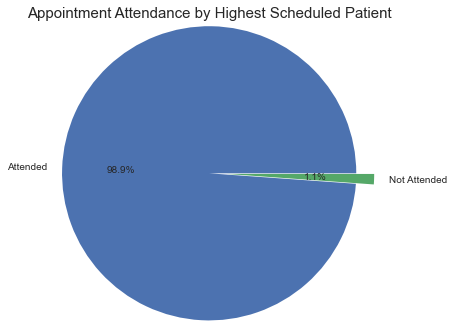

In [46]:
# plot pie chart of attendance distribution of highest scheduled patient
plt.pie([highest_sch_patient_att[0], highest_sch_patient_att[1]], labels=['Attended','Not Attended'],
        autopct='%1.1f%%', radius=1.23, explode={0,0.15})
# Assign chart title
plt.title('Appointment Attendance by Highest Scheduled Patient', fontdict={'size':15})
# display chart
plt.show()

Comment:

    The 87 attended appointments constitutes 98.9% of the 88 scheduled appointments for the patient.

[knowledge source: explode](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)

### 6. What is the Age Distribution of Patients?
<a id='q6'></a>
<li><a href='#bq1'>Back</a></li>

#### 6.1 Compute Age Statistics

In [47]:
# Check age statistics
appointment_data['age'].describe()

count    110527.000000
mean         37.089218
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

<a id="agedist"></a>
Comment:

    Computed the statistics on age column. This shows that the patients have the oldest patient(s) is 115 years old, the 
    youngest patient(s) is not up to a year old and the average age for all the patients is 37 years.
<ul>
<li><a href="#back3">Back 4</a></li>
</ul>

#### 6.2 Visualize Age Distribution

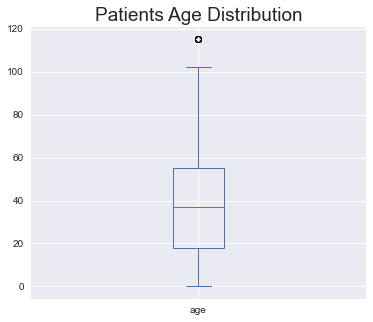

In [48]:
# Set figure size
plt.figure(figsize=(6,5))
# plot box chart of ages
appointment_data['age'].plot(kind='box')
# set chart title
plt.title('Patients Age Distribution', loc='center', font={'size':19});

<a id="back3"></a>
Comment:
    
    This plots confirms the deductions made in 6.1 that;
    1. The youngest patient(s) is not up to a year old
    2. The oldest patient(s) is/are over a hundred years which in 6.1 was calculated as 115.
    
    3. The plot also reveals that patients of age 115 are outliers of the age group. Implying there is some appreciable age
       gap between them and the next closest age to theirs.
<ul>
<li><a href="#agedist">Refer 4</a></li>
</ul>

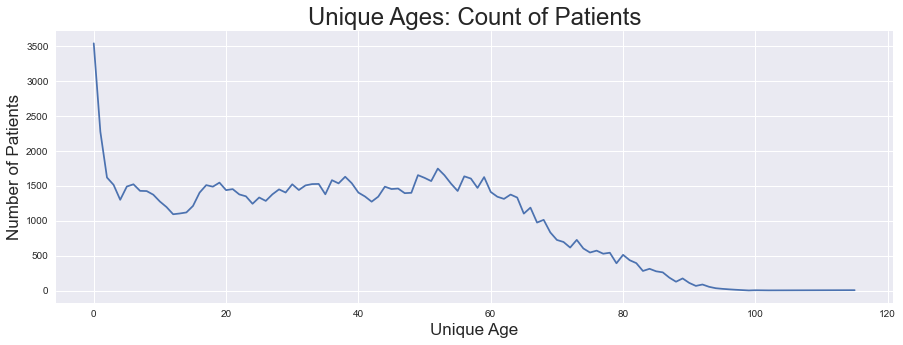

In [49]:
# define count of patient unique ages
age_count = appointment_data.groupby('age').count()

# set figure size
plt.figure(figsize=(15,5))
# plot a line graph of count of unique ages of patients
plt.plot(age_count.iloc[:,0:1])#.plot()
# Assign chart title
plt.title('Unique Ages: Count of Patients', fontdict={'size':24})
# Assign x-axis label
plt.xlabel('Unique Age', fontdict={'size':17})
# Assign y-xis label
plt.ylabel('Number of Patients', fontdict={'size':17})
# display chart
plt.show()  


<a id="back4"></a>
Comment:

    This line gragh of ages indicates that majority of the patients fall within the ages of 0 - 60. The implies the
    children, adults and middle agers from the majority of the patients.
<ul>
<li><a href="#demo">Refer 5</a></li>
</ul>

#### 6.3 Computing Ages With Highest and Least Number of Patients 

In [50]:
# compute number of unique ages of all patients
appointment_data.age.nunique()

103

<a id ="unique ages"></a>
Comment:

    The computation above reveals the patients could be group into 103 unique ages
<ul>
    <li><a href="#back5">Back 6</a></li>
</ul>

In [51]:
# create data frame for count of all unique ages of patients
ages_unique = pd.DataFrame(appointment_data.groupby('age').count()['patient_id'])
# view unique age with maximum and minimum number of patients
ages_unique.max()[0], ages_unique.min()[0]

(3539, 1)

In [52]:
appointment_data['age'].max()

115

<a id="single age"></a>
Comment:

    The computation above shows that the greatest group of patients at a particular age are 3539 and 1 patient
    whose age no other patient has
<ul>
<li><a href="#back6">Back 7</a></li>
</ul>

In [53]:
# Age with highest number of patients
ages_unique.index[ages_unique['patient_id']==3539]

Int64Index([0], dtype='int64', name='age')

<a id="back5"></a>
Comment:

    The above reveals that patients less than a year old form the greates group should all the patients be place under
    uniques age groups.
<ul>
<li><a href="#unique ages">Refer 6</a></li>
</ul>

In [54]:
# Age with lowest number of patients
ages_unique.index[ages_unique['patient_id']==1]

Int64Index([99], dtype='int64', name='age')

<a id="back6"></a>
Comment:

    The above reveals that there is only one patient who is 99 years old
<ul>
<li><a href="#single age">Refer 7</a></li>
</ul>

### 7. What is the Distribution of Appointment Attendance by Demographics?
<a id='q7'></a>
<li><a href='#bq1'>Back</a></li>

#### 7.1 Compute Total and Attended Appointments, and Proportion of Attended Appointments by Demographics

In [55]:
# find all attended appointments by demographics
attended_appointment_demo = attended_appointment['demographics'].value_counts()
# view data frame
attended_appointment_demo

adult         24479
middle age    24416
child         21382
old           17931
Name: demographics, dtype: int64

Comment:

    Computed attended appoints for each demographic group. This revealed, the adults age group attended scheduled 
    appointments the most.

In [56]:
# Compute total appointments by demographics
total_appointment_demo = appointment_data['demographics'].value_counts()
# view data frame
total_appointment_demo

adult         31903
middle age    30072
child         27379
old           21173
Name: demographics, dtype: int64

Comment:

    Computed the total scheduled appointment for each demographic group. THis revealed adults were the most scheduled for 
    appointments.

In [57]:
# Compute attended appointment as a proprtion of total appointments by demographics
attended_appointment_demo/total_appointment_demo

adult         0.767295
middle age    0.811918
child         0.780964
old           0.846880
Name: demographics, dtype: float64

<a id="demo_prop"></a>
<a id="demo2"></a>

Comment:

    Computed the proportions of attended appointments for each demographic group. This revealed that:
        1. patients 60 years and above relatively attended the most of scheduled appointments.
        2. patients 18 - 39 years relatively attended scheduled appointments the least
      
<ul>
<li><a href="#demo">Refer 8</a></li>
<li><a href="#stack">Back 9</a></li>
</ul>

#### 7.2 Visualize Total and Attended Appointments, and Proportion of Attended Appointments by Demographics

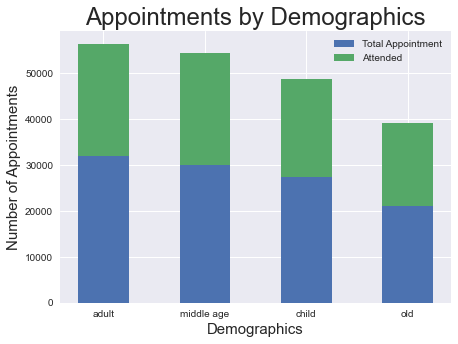

In [58]:
# set figure size
plt.figure(figsize=(7,5))
#plot stacked bar chart of total and attended appointments per demograhic category
plt.bar(total_appointment_demo.index, total_appointment_demo,0.5, label='Total Appointment')
plt.bar(attended_appointment_demo.index,attended_appointment_demo, 0.5,label='Attended',bottom=total_appointment_demo)
# Assign chart title
plt.title('Appointments by Demographics', fontdict={'size':24})
# # Assign x-xis label
plt.xlabel('Demographics', fontdict={'size':15})
# # Assign y-axis label
plt.ylabel('Number of Appointments', fontdict={'size':15})
# display legend
plt.legend()
# display chart
plt.show()

<a id="stack"></a>
Comment:

    1. The above stacked column chart shows the total appointments (in blue) and attended appointments (in green) for each
       demographic group. 
    
    2. The closeness in length of the color segments for each group indicates a higher proportion of atteneded 
       appointments.

    3. The 'old' has the lowest difference between its color segments, thus, it has the highest attended appointments which 
       confirms the deduction in 7.1 above. 
<ul>
<li><a href="#demo2">Refer 9</a></li>
</ul>
       


[knowledge source: stacked bar chart](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html)

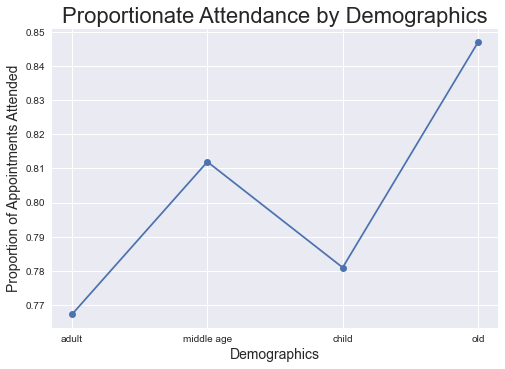

In [59]:
# plot line chart to show proportionate attended appointments by demographics
plt.plot(attended_appointment_demo.index, attended_appointment_demo/total_appointment_demo, '-o')
# Assign chart title
plt.title('Proportionate Attendance by Demographics', fontdict={'size':22})
# Assign x-axis label
plt.xlabel('Demographics', fontdict={'size':14})
# Assign y-axis label
plt.ylabel('Proportion of Appointments Attended', fontdict={'size':14})
# display chart
plt.show()

Comment:
    
    Line chart showing demographic group and their proportionate attended appointments. It shows the old attended the most 
    of scheduled appointments and the adults attended the least relative to the other groups.
<a id="pie"></a>
<ul>
<li><a href="#back 10">Back 10</a></li>
</ul>

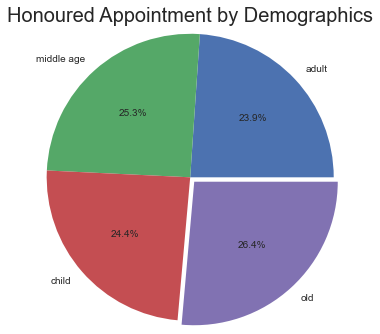

In [60]:
# plot a pie chart of proportion of appointments attended for each demographic category
plt.pie(attended_appointment_demo/total_appointment_demo, labels=attended_appointment_demo.index, 
        autopct='%1.1f%%', radius=1.2, explode=[0,0,0,0.05])
# Assign chart title
plt.title('Honoured Appointment by Demographics', font={'size':20})
# Display chart
plt.show()

<a id="back 10"></a>
Comment:
    
    Pie chart showing attended appoints percentages for the various demographic groups. The old had the greatest percentage
    of 26.4% and the adults had the least percentage of 23.9% confirming the deduction made from the line graph above.

<ul>
<li><a href="#pie">Refer 10</a></li>
</ul>

### 8. What is the Distribution of Appointments by Gender?
<a id='q8'></a>
<li><a href='#bq1'>Back</a></li>

#### 8.1 Compute Total Appointments by Gender

In [61]:
# Compute count of males scheduled for appointment
males = appointment_data.query('gender =="M"').count()[0]
# Compute count of females scheduled for appointment
females = appointment_data.query('gender =="F"').count()[0]

# view counts of appointments for each gender
males, females

(38687, 71840)

Comment:

    Computed total scheduled appointments for each gender (Male and Female). The numbers shows that most patients scheduled 
    for appointments were females.

#### 8.2 Visualize Count of Appointments by Gender

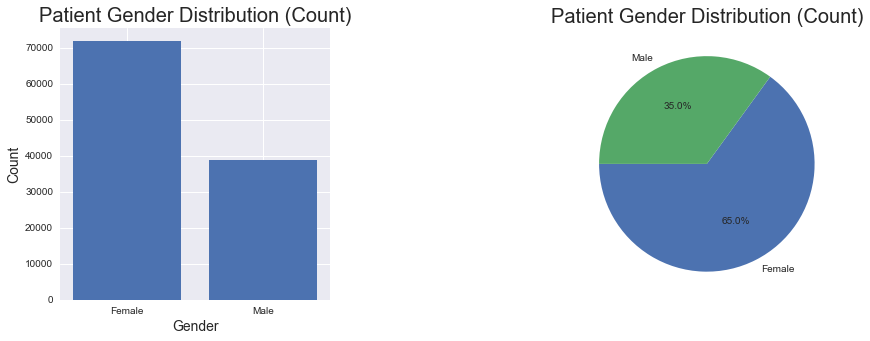

In [62]:
# Plot bar chart showing gender distribution
plot_bar_pie(females, males,'Patient Gender Distribution (Count)','Gender','Count','Female','Male')

Comment:

    Bar chart (left) and pie chart (right) indicating the difference in appointments by gender. The pie chart indicate that 
    65% of all patients scheduled for appointments were females.

### 9. Which Gender Attended Appointments the Most?
<a id='q9'></a>
<li><a href='#bq1'>Back</a></li>

#### 9.1 Compute Attended Appointments by Gender

In [63]:
# Compute attended appoints by gender
attended_apt_gender = attended_appointment.groupby('gender').count()['patient_id']
# view results
attended_apt_gender

gender
F    57246
M    30962
Name: patient_id, dtype: int64

Comment:

    Computed attended appoints for each gender

#### 9.2 Visualize Proportion of Attended Appointments by Gender

Text(0.5, 1.0, ' Proportion of Attended Appointment')

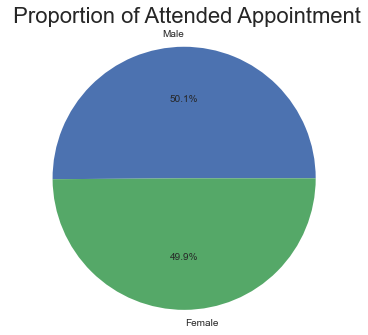

In [64]:
# Plot pie chat for proportion of attended aappointment by males and females
plt.pie([attended_apt_gender[1]/males,attended_apt_gender[0]/females], labels=['Male','Female'], 
        autopct='%1.1f%%', radius=1.1);
# Assign chart title
plt.title(' Proportion of Attended Appointment', fontdict={'size':22})

Comment:

    The pie chart indicates that relatively males attended more appointments than females. Even though more females were 
    schedueld, mMales slightly outperform females by 0.2% in attending appointments.

### 10. What is the Distribution of Patients by Welfare Enrolment Status?
<a id='q10'></a>
<li><a href='#bq1'>Back</a></li>

#### 10.1 Computing Count of Patients On and Not On the Welfare Programme

In [65]:
# compute count of patients with and without scholarship. NB: "0" means no scholarship and "1" means patient has a schoalrship
welfare_status = appointment_data['scholarship'].value_counts()
# view reults
welfare_status

0    99666
1    10861
Name: scholarship, dtype: int64

Comment:

    Computed the number of patients schedueld for appointment who are or not of the welfare programme. This reveals most of 
    the scheduled patients were not on the welfare programme.
<a id="scho"></a>  
<ul>    
<li><a href="#back 11">Back 11</a></li>
</ul>

#### 10.2 Visualize Distribution of Patients by Welfare Enrollment Status

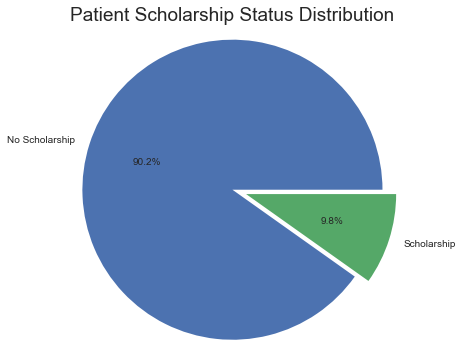

In [66]:
# define figure size
plt.figure(figsize=(8,6))
# plot pie chart of distribution of patietns by scholarships
plt.pie(welfare_status, autopct='%0.1f%%', labels=['No Scholarship','Scholarship'], startangle=360, 
                radius=1.15, explode={0,0.11})
# Assign chart title
plt.title('Patient Scholarship Status Distribution', fontdict={'size':19})
# display chart
plt.show()

<a id="back 11"></a>
Comment:

    The baove pie chart indicates that only 9.8% constituting 10861 of patients schedduled for appointment are on the
    welfare programme.
<ul>    
<li><a href="#scho">Refer 11</a></li>
</ul>

### 11. Does Being on the Welfare Programme Have a Positive Impact on Attended Appointment?
<a id='q11'></a>
<li><a href='#bq1'>Back</a></li>

#### 11.1  Compute Count of Patients by Welfare Status

In [67]:
# Total number of patients with scholarship
on_welfare = welfare_status[1]
# Total number of patients without scholarship
not_on_welfare = welfare_status[0]

# view results
on_welfare, not_on_welfare

(10861, 99666)

Comment:

    Assigned definite variables to number of attended patients on and not on the welfare programme

#### 11.2 Compute Attended Appointments by Welfare Status

In [68]:
# compute number of patients on and not on the welfare program who Attended their appointments
attended_appointment_welfare = attended_appointment.value_counts('scholarship')
# view results
attended_appointment_welfare

scholarship
0    79925
1     8283
dtype: int64

Comment:
    
    Computation above indicates most patients who attended their appointments were on the welfare programme.

#### 11.3 Compute Not Attended Appointment by Welfare Status 

In [69]:
# find number of those who did not attend their appointment
not_attended_appointments = appointment_data[appointment_data['no_show']=='Yes']
# Group not attended appointments by welfare status
not_attended_apt_welfare = not_attended_appointments.value_counts('scholarship')
# view reults
not_attended_apt_welfare

scholarship
0    19741
1     2578
dtype: int64

Comment:

    Computation above indicates most patients who did attended their appointments were also not on the welfare programme.

#### 11.4 Compute Attended Appointments as a Proportion of Total Appointments by Welfare Status 

In [70]:
# find proportion of non-scholarship holders that attendeded their appointments
not_on_welfare_prop = attended_appointment_welfare[0]/not_on_welfare

# find proportion of scholarship holders that attendeded their appointments
on_welfare_prop = attended_appointment_welfare[1]/on_welfare

# view the proportions
on_welfare_prop, not_on_welfare_prop

(0.7626369579228433, 0.8019284409929164)

Comment:

    The proportionate attended appointments by gender computed above indicates that patients not on the welfare programme
    relatively attended more scheduled appointments than those on the welfare programe.

#### 11.5 Visualization  Attended Appointments as Proportion of Total Appointment by Welfare Status

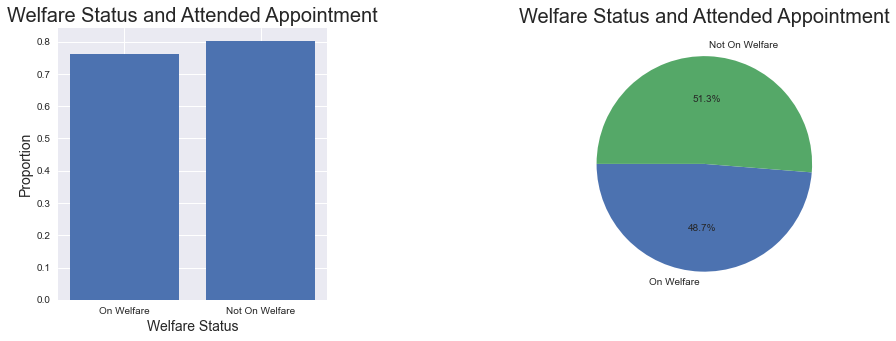

In [71]:
# plot bar chart of welfare status vrs Attended Appointment
plot_bar_pie(on_welfare_prop, not_on_welfare_prop, 'Welfare Status and Attended Appointment','Welfare Status','Proportion',
            'On Welfare','Not On Welfare')

Comment:

    The bar (left) and pie (right) charts above displays the proportionate attended appointments by gender. The pie chart 
    reveals that 51.3% of attended appoints were patients not on the welfare programme.

### 12. What is the Appointment Distribution by Health Issue / Condition of Patients?
<a id='q12'></a>
<li><a href='#bq1'>Back</a></li>

#### 12.1 Compute Appointment Count by Patients Health Condition(s)

In [72]:
# compute appointment count by patients health condition(s)
patient_hlth_cond = pd.DataFrame(appointment_data[['hipertension','diabetes','alcoholism','handcap']].value_counts())
# view results
patient_hlth_cond

0
hipertension diabetes alcoholism handcap       
0            0        0          0        84115
1            0        0          0        13663
             1        0          0         5885
0            0        1          0         1922
             1        0          0         1341
             0        0          1         1197
1            0        1          0         1042
                      0          1          581
             1        0          1          345
                      1          0          243
0            1        1          0           75
                      0          1           40
             0        1          1           35
1            0        1          1           29
             1        1          1           13
0            1        1          1            1

Comment:

    Computed the number of patients group by their respective medical condition(s).

In [73]:
# compute percentage of (0,0,0,0)
no_condition_appt = round((84115/appointment_data.count()[0])*100)

print("Approximately",no_condition_appt,"%", 
      "of scheduled patients do not have a medical condition")

Approximately 76 % of scheduled patients do not have a medical condition


#### 12.2 Visualize Appointment Count by Patients Health Condition(s)

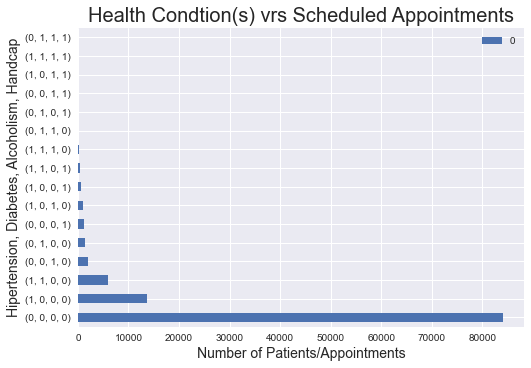

In [74]:
# plot bar chart of patients health conditions
patient_hlth_cond.plot(kind='barh')
# Assign chart title
plt.title('Health Condtion(s) vrs Scheduled Appointments', fontdict={'size':20})
# Assign x-axis label
plt.xlabel('Number of Patients/Appointments', fontdict={'size':14})
# Assign y-axis label
plt.ylabel('Hipertension, Diabetes, Alcoholism, Handcap', fontdict={'size':14})
# display chart
plt.show()

Comment: 
    
    The bar chart above shows that most of the patients (84115) scheduled for appointments hand no medical 
    conditions (0,0,0,0)

### 13. How Does Sending SMS Reminders Impact Attendance?

#### 13.1 Compute Count of Appointments by SMS_Receipt Status

In [75]:
# compute counts of appointments by sms_receipt status
sms_reminder = appointment_data['sms_received'].value_counts()
# view results
sms_reminder

0    75045
1    35482
Name: sms_received, dtype: int64

Comment: 
    
    The computation above indicates most patients did not receive sms as reminders of their appointment.

#### 13.2 Compute Number of Attended Appointments With and Without SMS Reminder (Receipt)
<a id='q13'></a>
<li><a href='#bq1'>Back</a></li>

In [76]:
# compute number of attended appointments by patients who received sms reminders
attended_appt_reminded = attended_appointment.query('sms_received == 1').count().iloc[0]

# compute number of attended appointments by patients who did not receive sms reminders
attended_appt_no_reminder = attended_appointment.query('sms_received == 0').count().iloc[0]

# view reults for both computed values above
attended_appt_reminded, attended_appt_no_reminder

(25698, 62510)

Comment:

    The above computation indicates that 25698 patients who received sms attended their appointments as against 62510 of 
    patients who did not receive sms.

#### 13.3 Compute Proportions of Appointment Attendance by SMS Reminder (Receipt)

In [77]:
# compute attendded appointments by patients with sms reminders - proportion of total appointments by sms reminders
attended_reminded_prop = attended_appt_reminded/sms_reminder[1]

# compute unattendded appointments by patients with sms reminders - proportion of total appointments by sms reminders
attended_no_reminder_prop = attended_appt_no_reminder/sms_reminder[0]

#### 13.4 Visualize Proportions of Appointment Attendance by SMS Reminder (Receipt)

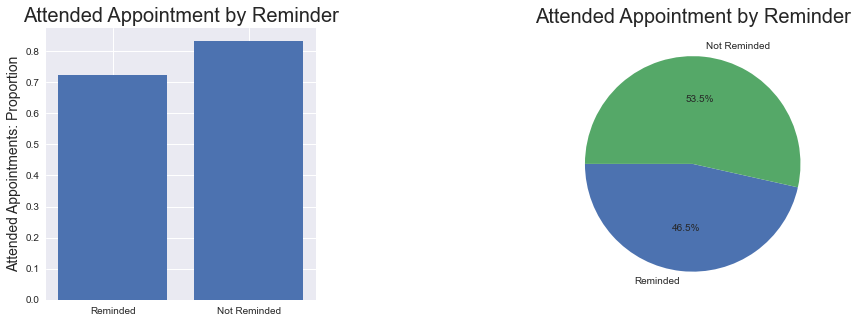

In [78]:
# Plot bar and pie charts for appointment attendance by SMS reminder
plot_bar_pie(attended_reminded_prop, attended_no_reminder_prop, 'Attended Appointment by Reminder','',
             'Attended Appointments: Proportion','Reminded','Not Reminded')

Comment:
    
    1. The bar chart above indicates the proportionately more appointments were attended by patients who did not 
       receive sms
       
    2. The pie chart reveals that 53.5% of attended appointments were by patients who did no receive an sms

### 14. What is the Average Delay in Attending Scheduled Appointment in Days?
<a id='q14'></a>
<li><a href='#bq1'>Back</a></li>

In [79]:
# compute average delay in scheduled and attended appointments
np.mean(attended_appointment['appointment_day']-attended_appointment['scheduled_day']).days


8

Comment:

    The computation above indicates that on the average, it takes 8 days 
    after the scheduled day for a patient to attend their scheduled appointment.

### 15. What is the Change in Appointment Attendance from 2015 to 2016? 
<a id='q15'></a>
<li><a href='#bq1'>Back</a></li>

#### 15.1 Compute Total Yearly Appointments

In [80]:
# find total appointment by year
yearly_appointment = appointment_data['scheduled_day'].dt.year.value_counts()
yearly_appointment

2016    110465
2015        62
Name: scheduled_day, dtype: int64

#### 15.2 Visualize Total Yearly Appointments

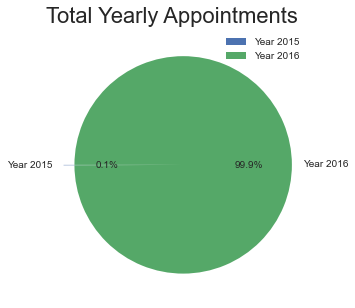

In [81]:
# set figure size
plt.figure(figsize=(6,5))
#plot stacked bar chart of total and attended appointments per demograhic category
plt.pie([yearly_appointment.iloc[1],yearly_appointment.iloc[0]], labels=['Year 2015','Year 2016'], autopct='%1.1f%%', 
                    explode={0,0.1}, radius=1, startangle=180)
# Assign chart title
plt.title('Total Yearly Appointments', fontdict={'size':22}, loc='center')
# display legends
plt.legend()
#display chart
plt.show()

Comment:
    
    The pie chart reveals that a neglible portion (0.1%) constituting 62 out 110527 scheduled appointments were from the 
    year 2015.

#### 15.3 Compute Yearly Attended and Not Attended Appointments

In [82]:
# find number of attended and unattended appointments in 2016
appointment_data_2016 = appointment_data.query('scheduled_day.dt.year == 2016')
# count by attendance status
appointment_data_16 = appointment_data_2016['no_show'].value_counts()
# view results
appointment_data_16

No     88165
Yes    22300
Name: no_show, dtype: int64

Comment:

    Computed appointments attended and not attended appointments in the year 2016. This revealed that a greater number 
    (88165 out of 110465) of appointments were attended.

In [83]:
# find number of attended and unattended appointments in 2015
appointment_data_2015 = appointment_data.query('scheduled_day.dt.year == 2015')
# count by attendance status
appointment_data_15 = appointment_data_2015['no_show'].value_counts()
# view reults
appointment_data_15

No     43
Yes    19
Name: no_show, dtype: int64

Comment:

    Computed appointments attended and not attended appointments in the year 2015. This revealed that a greater number 
    (43 out of 62) of appointments were not attended.

#### 15.4 Compute Attended Appointments as Proportions for Each Year

In [84]:
# find proportion for attended appointments in 2015
attended_prop_2015 = appointment_data_15[0] / yearly_appointment.iloc[1]
 
# find proportion for attended appointments in 2016
attended_prop_2016 = appointment_data_16[0] / yearly_appointment.iloc[0]

# view computed values
attended_prop_2015, attended_prop_2016

(0.6935483870967742, 0.798126103290635)

In [85]:
# compute percentage difference in proportion of attended appointmetns per year
round((attended_prop_2016 - attended_prop_2015)*100,1)

10.5

Comment:

    Computed attended appointments as a proportion of scheduled appointments for each year.
    This revealed that, relatively more patients (0.798) in 2016 attended their scheduled appointments. They out performed
    the 2015 attended appointments by aproximately 10.5%

#### 15.5 Visualize Attended Appointments as Proportions for Each Year

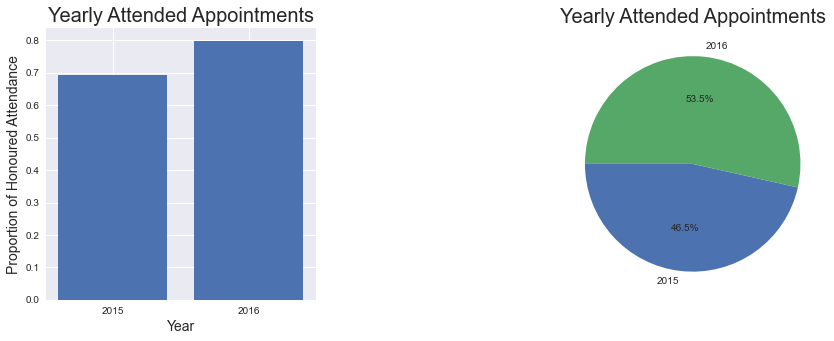

In [86]:
# plot bar and pie chart of Attended Appointments Each Year as Proportions
plot_bar_pie(attended_prop_2015, attended_prop_2016, 'Yearly Attended Appointments','Year', 
             'Proportion of Honoured Attendance','2015', '2016')

Comment:

    1.The charts above displays that more appointments in 2016 were attended relative to 2015.
    2.The pie chart specifically shows that 53.5% of all attended appointments were from 2016.

<BarContainer object of 2 artists>

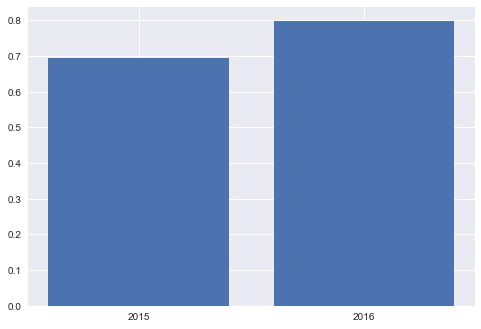

In [87]:
plt.bar(['2015', '2016'],[attended_prop_2015, attended_prop_2016])

<a id='conclusions'></a>
## Conclusions
<li><a href="#bq1">Click Here to Questions</a></li>

    1. In total, approximately 80% of scheduled appointments were attended.

    2. Jardim Camburi hospital scheduled more patients than any other for appointments but in terms of attended 
       appointments was not in the lead. It had 81% attendance rate. (Refer to Questions 2,3 and 4).

    3. Patient with ID: 822145925426128 was scheduled the highest (88 times) among all patients to Rendecao hospital with 
       a 98% attendance rate. (Refer to Question 5).

    4. a) Over 80% of the patient population are under 60 years. (Refer to Demographics Definitions in Data Wrangling and 
       Question 7).

       b. These formed approximately 70% of the total attended appointments. This could imply the general population of 
       Brazil is youthful. However proportionately, old people attend scheduled appointments more than all the other 
       demographic groups i.e. child, youth, adult. (Refer to Questions 6 and 7).

    5. The patient population is mostly females (65% of total patients). However the proportionate attendance rate for 
       males slightly exceeds that of females by 0.2%. (Refer to Questions 8 and 9).

    6. Over 90% of patients are not on welfare but attended appointments the most than those on welfare. Approximately 51% 
       of attended appointments were by those not on welfare. This indicates being on welfare is not a motivation for a 
       patient attending his or her appointment (Refer to Questions 10 and 11).

    7. Approximately 76 % of patients scheduled for appointments do not have a medical condition. This is an indicator that 
       the general Brazilian popular is averagely healthy. (Refer to Question 12).

    8. Sending sms reminders does not necessarily increase the attendance rate as more patients who did not receive sms 
       reminders attended their appointments than those who did.  (Refer to Question 13).

    9. Averagely, it should be expected for a patient to attend his/her appointment with 8 days from the schedule day. 
       (Refer to Question 14).
        
 
### Limitations

    1. These deductions is not exhaustive as other parameter such as patient proximity to hospital etc. was not considered 
       in this analysis. I believe if this parameter is considered, the deductions would change appreciably.

    2. Also, the sample data from 2015 was relatively small thus creating the potential of misrepresentation of the yearly 
       appointment and attended appointment distribution.

    3. For point 8, the deduction is not exhaustive. It would be more accurate by comparing this the analysis from this 
       data with that from data which was gathered before the introduction of sms reminders.

